In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation

In [2]:
# read the csv file into a pandas DataFrame
df_data = pd.read_csv("/Users/alexandrarontogianni/Downloads/data for test case (Data Science Marketing Assitant Position).csv", delimiter = ",")

# clean the last column by removing quotes and semicolons
df_data['score_neurodivergent;;;'] = df_data['score_neurodivergent;;;'].str.replace('"', '').str.replace(';', '')

# convert the last column to float64
df_data['score_neurodivergent;;;'] = df_data['score_neurodivergent;;;'].astype('float64')

# change the name of the last column
df_data = df_data.rename(columns={'score_neurodivergent;;;': 'score_neurodivergent'}) 

# display the DataFrame
df_data

,Id,Title,LocationNormalized,ContractType,ContractTime,Category,SalaryNormalized,score_overall,score_men,score_women,score_non_conforming,score_advantaged_ethnicity,score_disadvantaged_ethnicity,score_young,score_old,score_abled,score_disabled,score_neurotypical,score_neurodivergent
0,0,English Teachers Liverpool area,UK,NaN,contract,Teaching Jobs,28800.0,47.820734,83.021101,60.744037,61.134862,68.951376,57.226606,65.043119,58.008257,68.951376,49.800917,68.951376,49.800917
1,1,Senior UI Developer/Team Leader,Little Chesterford,NaN,permanent,IT Jobs,50000.0,48.120668,87.501028,53.990488,56.837789,69.979177,52.019280,67.350900,50.267095,67.350900,44.572494,67.350900,43.696401
2,2,Optometrist West Midlands,Birmingham,NaN,NaN,Healthcare & Nursing Jobs,42000.0,81.452233,98.765777,80.156311,83.465049,88.428155,80.156311,88.428155,83.465049,88.428155,80.156311,88.428155,80.156311
3,3,Optometrist Reading,Reading,NaN,NaN,Healthcare & Nursing Jobs,35000.0,37.720926,60.371066,60.371066,41.341624,49.126396,44.801523,49.126396,51.721320,49.126396,44.801523,49.126396,42.206599
4,4,Lighting Designer/ Lighting Technical Sales/ L...,Lancashire,NaN,permanent,Engineering Jobs,27500.0,86.013898,99.138136,85.147458,87.457966,91.381356,85.147458,91.381356,86.302712,91.381356,85.147458,91.381356,85.147458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Asst General Manager ****K Branded St Alban...,Hertfordshire,NaN,NaN,Hospitality & Catering Jobs,32000.0,35.384907,85.057764,34.462795,38.718696,59.656522,34.462795,50.131056,37.654720,50.131056,34.462795,50.131056,34.462795
4996,4996,Developer Commodities Front Office Leading I...,London,NaN,permanent,IT Jobs,45000.0,35.073099,81.511142,35.824624,37.494680,53.981337,33.677409,51.133426,38.210418,51.133426,34.154568,51.133426,33.677409
4997,4997,Staff Nurse RGN/RMN Newtown Abbey Nights Ne...,Newtownabbey,full_time,NaN,Healthcare & Nursing Jobs,23040.0,63.725462,80.942581,70.498710,66.650968,71.048387,65.551613,67.383871,70.315484,71.048387,65.551613,71.048387,65.551613
4998,4998,Rceptionist,Dunoon,full_time,NaN,Admin Jobs,13977.0,76.565128,98.370192,74.853846,79.223077,85.776923,74.853846,85.776923,79.223077,85.776923,74.853846,85.776923,74.853846


In [3]:
# create a dictionary with new column names to make them simpler and more intuitive
new_col_names = {
    'Title': 'Job title',
    'LocationNormalized': 'Location',
    'ContractType': 'Contract type',
    'ContractTime': 'Contract time',
    'Category': 'Job category',
    'SalaryNormalized': 'Salary',
    'score_overall': 'Overall',
    'score_men': 'Men',
    'score_women': 'Women',
    'score_non_conforming': 'LGBTQ+',
    'score_advantaged_ethnicity': 'Priviliged ethnicity',
    'score_disadvantaged_ethnicity': 'Marginalized ethnicity',
    'score_young':'Younger',
    'score_old': 'Older',
    'score_abled': 'Physically abled',
    'score_disabled':'Disabled',
    'score_neurotypical': 'Neurotypical',
    'score_neurodivergent': 'Neurodivergent'
    
}

# rename the columns using the dictionary
new_df_data = df_data.rename(columns=new_col_names)

# display the updated DataFrame
new_df_data

,Id,Job title,Location,Contract type,Contract time,Job category,Salary,Overall,Men,Women,LGBTQ+,Priviliged ethnicity,Marginalized ethnicity,Younger,Older,Physically abled,Disabled,Neurotypical,Neurodivergent
0,0,English Teachers Liverpool area,UK,NaN,contract,Teaching Jobs,28800.0,47.820734,83.021101,60.744037,61.134862,68.951376,57.226606,65.043119,58.008257,68.951376,49.800917,68.951376,49.800917
1,1,Senior UI Developer/Team Leader,Little Chesterford,NaN,permanent,IT Jobs,50000.0,48.120668,87.501028,53.990488,56.837789,69.979177,52.019280,67.350900,50.267095,67.350900,44.572494,67.350900,43.696401
2,2,Optometrist West Midlands,Birmingham,NaN,NaN,Healthcare & Nursing Jobs,42000.0,81.452233,98.765777,80.156311,83.465049,88.428155,80.156311,88.428155,83.465049,88.428155,80.156311,88.428155,80.156311
3,3,Optometrist Reading,Reading,NaN,NaN,Healthcare & Nursing Jobs,35000.0,37.720926,60.371066,60.371066,41.341624,49.126396,44.801523,49.126396,51.721320,49.126396,44.801523,49.126396,42.206599
4,4,Lighting Designer/ Lighting Technical Sales/ L...,Lancashire,NaN,permanent,Engineering Jobs,27500.0,86.013898,99.138136,85.147458,87.457966,91.381356,85.147458,91.381356,86.302712,91.381356,85.147458,91.381356,85.147458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Asst General Manager ****K Branded St Alban...,Hertfordshire,NaN,NaN,Hospitality & Catering Jobs,32000.0,35.384907,85.057764,34.462795,38.718696,59.656522,34.462795,50.131056,37.654720,50.131056,34.462795,50.131056,34.462795
4996,4996,Developer Commodities Front Office Leading I...,London,NaN,permanent,IT Jobs,45000.0,35.073099,81.511142,35.824624,37.494680,53.981337,33.677409,51.133426,38.210418,51.133426,34.154568,51.133426,33.677409
4997,4997,Staff Nurse RGN/RMN Newtown Abbey Nights Ne...,Newtownabbey,full_time,NaN,Healthcare & Nursing Jobs,23040.0,63.725462,80.942581,70.498710,66.650968,71.048387,65.551613,67.383871,70.315484,71.048387,65.551613,71.048387,65.551613
4998,4998,Rceptionist,Dunoon,full_time,NaN,Admin Jobs,13977.0,76.565128,98.370192,74.853846,79.223077,85.776923,74.853846,85.776923,79.223077,85.776923,74.853846,85.776923,74.853846


# Analyzing Job Posting Inclusivity for Different Groups

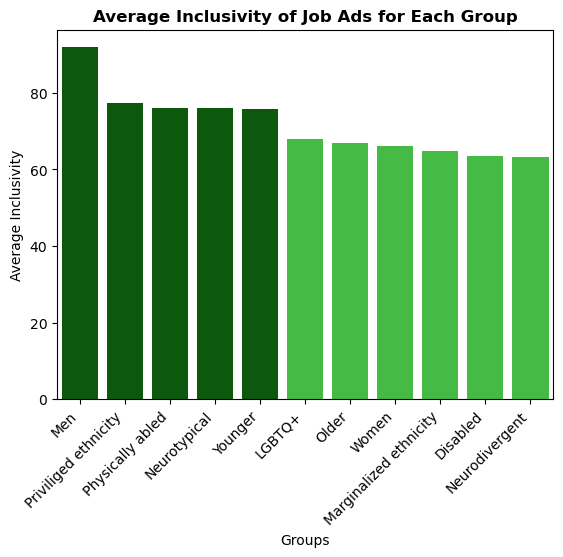

In [4]:
# Calculate the mean scores for each group
group_scores = new_df_data[['Men', 'Women', 'LGBTQ+', 'Priviliged ethnicity', 'Marginalized ethnicity', 'Younger', 'Older', 'Physically abled', 'Disabled', 'Neurotypical', 'Neurodivergent']].mean()

# Convert the group scores to a DataFrame and reset the index
group_scores_df = group_scores.reset_index()

# Rename the columns to 'group' and 'mean_score'
group_scores_df.columns = ['group', 'mean_score']

# Sort the DataFrame by mean score in descending order
group_scores_df = group_scores_df.sort_values(by='mean_score', ascending=False)

# Define a custom color palette with two shades of green
custom_palette = ["darkgreen"] * 5 + ["limegreen"] * 6

# Create a Seaborn bar plot
sns.barplot(x='group', y='mean_score', data=group_scores_df, palette=custom_palette)

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# Set the plot title and axis labels
plt.title('Average Inclusivity of Job Ads for Each Group', fontweight="bold")
plt.xlabel('Groups')
plt.ylabel('Average Inclusivity') 
plt.show()

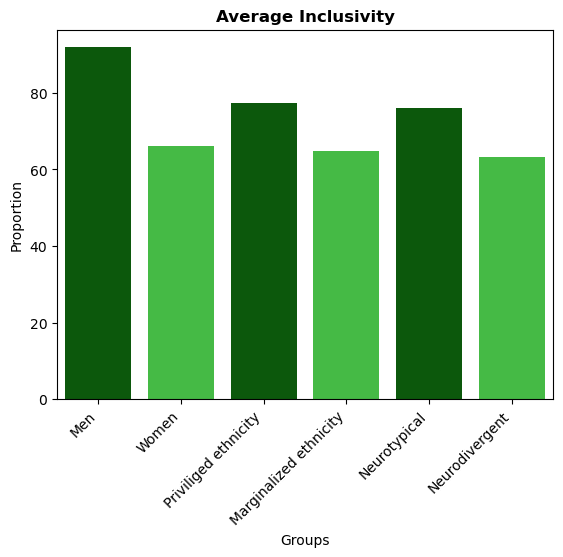

In [5]:
# Calculate the mean values for 6 certain groups
mean_score_men = new_df_data['Men'].mean()
mean_score_women = new_df_data['Women'].mean()
mean_score_priviliged_ethnicity = new_df_data['Priviliged ethnicity'].mean()
mean_score_marginalized_ethnicity = new_df_data['Marginalized ethnicity'].mean()
mean_score_neurotypical = new_df_data['Neurotypical'].mean()
mean_score_neurodivergent = new_df_data['Neurodivergent'].mean()

# Create a Seaborn bar plot of the means
data = pd.DataFrame({'Men': [mean_score_men],'Women': [mean_score_women], 'Priviliged ethnicity': [mean_score_priviliged_ethnicity], 'Marginalized ethnicity': [mean_score_marginalized_ethnicity], 'Neurotypical': [mean_score_neurotypical], 'Neurodivergent': [mean_score_neurodivergent]})
data_melt = pd.melt(data)
sns.barplot(x='variable', y='value', data=data_melt, palette=['darkgreen', 'limegreen'])
plt.title('Average Inclusivity', fontweight="bold")
plt.xlabel('Groups')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.show()

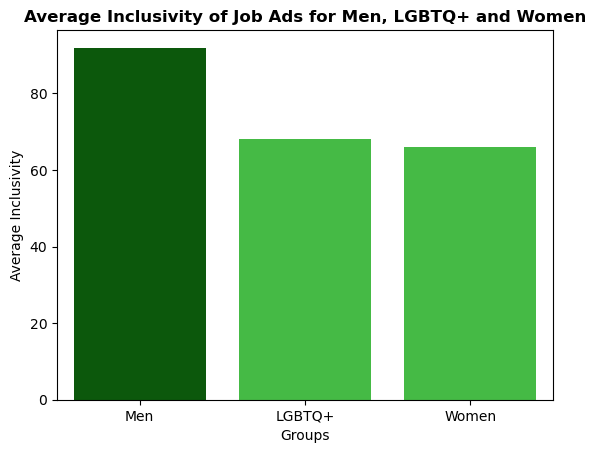

In [6]:
# Calculate the mean values for Men, LGBTQ+, Women
mean_score_men = new_df_data['Men'].mean()
mean_score_lbqtg = new_df_data ['LGBTQ+'].mean()
mean_score_women = new_df_data['Women'].mean()

# Create a Seaborn bar plot of the means
data = pd.DataFrame({'Men': [mean_score_men],'LGBTQ+': [mean_score_lbqtg], 'Women': [mean_score_women]})
data_melt = pd.melt(data)
custom_palette = ["darkgreen"] * 1 + ["limegreen"] * 2
sns.barplot(x='variable', y='value', data=data_melt, palette=custom_palette)
plt.title('Average Inclusivity of Job Ads for Men, LGBTQ+ and Women', fontweight="bold")
plt.xlabel('Groups')
plt.ylabel('Average Inclusivity')
plt.show()

# Exploring the hidden relation between job categories and Men vs. Women groups 

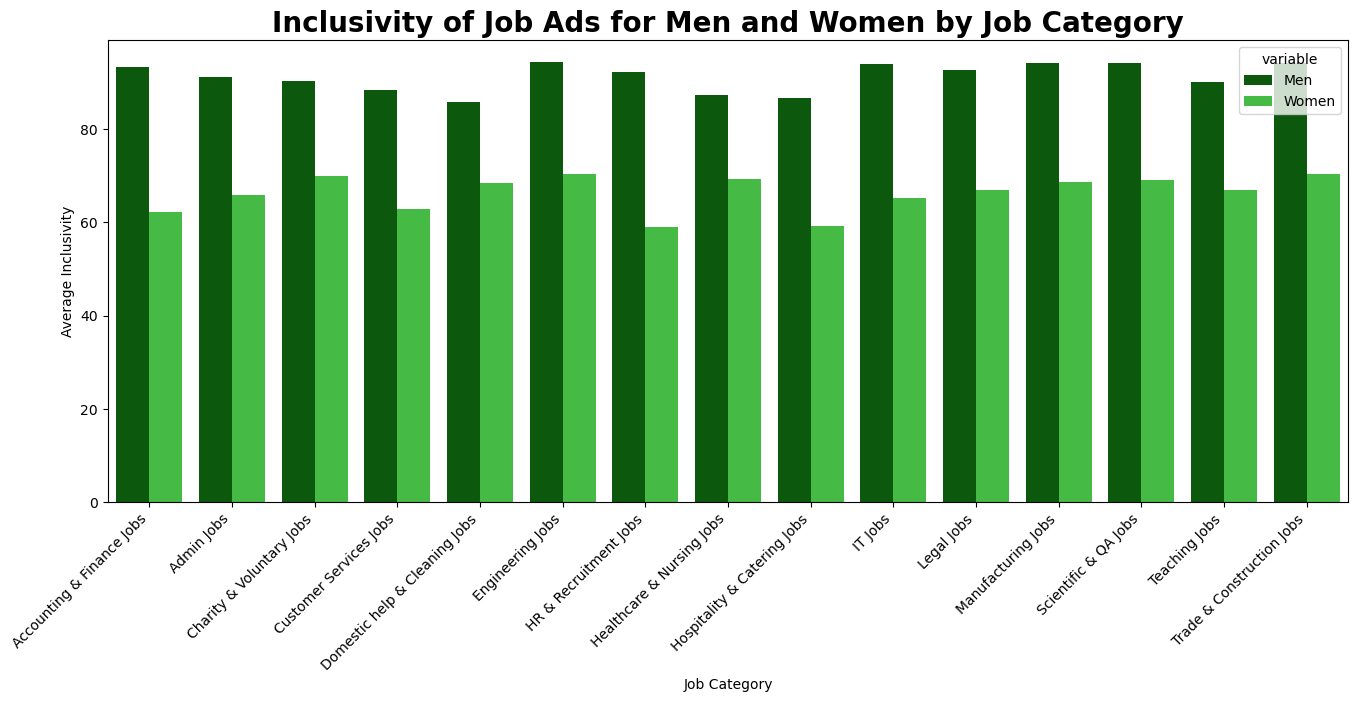

In [7]:
# Calculate the mean values for Men and Women by Job Category
mean_scores = new_df_data.groupby('Job category')[['Men', 'Women']].mean().reset_index()

# Create a bigger figure
fig, ax = plt.subplots(figsize=(16, 6))

# Create a Seaborn bar plot of the means with hue
sns.barplot(x='Job category', y='value', hue='variable', data=pd.melt(mean_scores, id_vars='Job category'), palette=['darkgreen', 'limegreen'])
plt.title('Inclusivity of Job Ads for Men and Women by Job Category', fontweight="bold", fontdict={"fontsize": 20})
plt.xlabel('Job Category')
plt.ylabel('Average Inclusivity')
plt.xticks(rotation=45, ha='right')
plt.show()

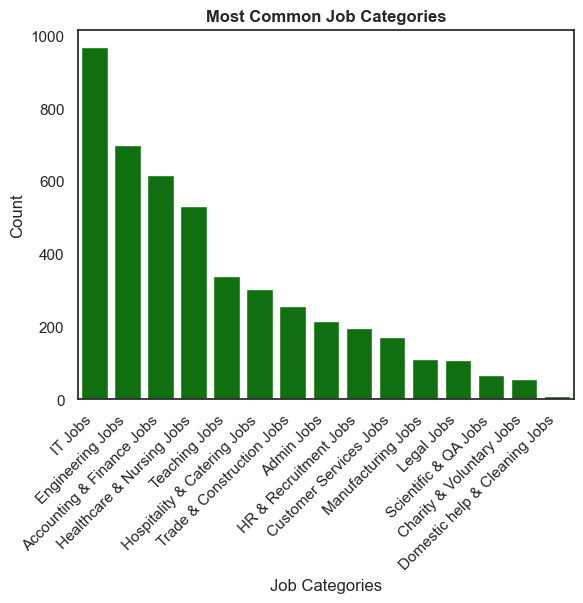

In [8]:
# Create a countplot to visualise the most and least common job categories
sns.set(style="white")
ax = sns.countplot(x="Job category", data=new_df_data, palette=['green'], order=new_df_data['Job category'].value_counts().index)
ax.set_xlabel("Job Categories")
plt.xticks(rotation=90)
ax.set_ylabel("Count")
plt.title("Most Common Job Categories",fontweight="bold")

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Exploring the relation between the most inclusive and most exclusive groups vs. salary

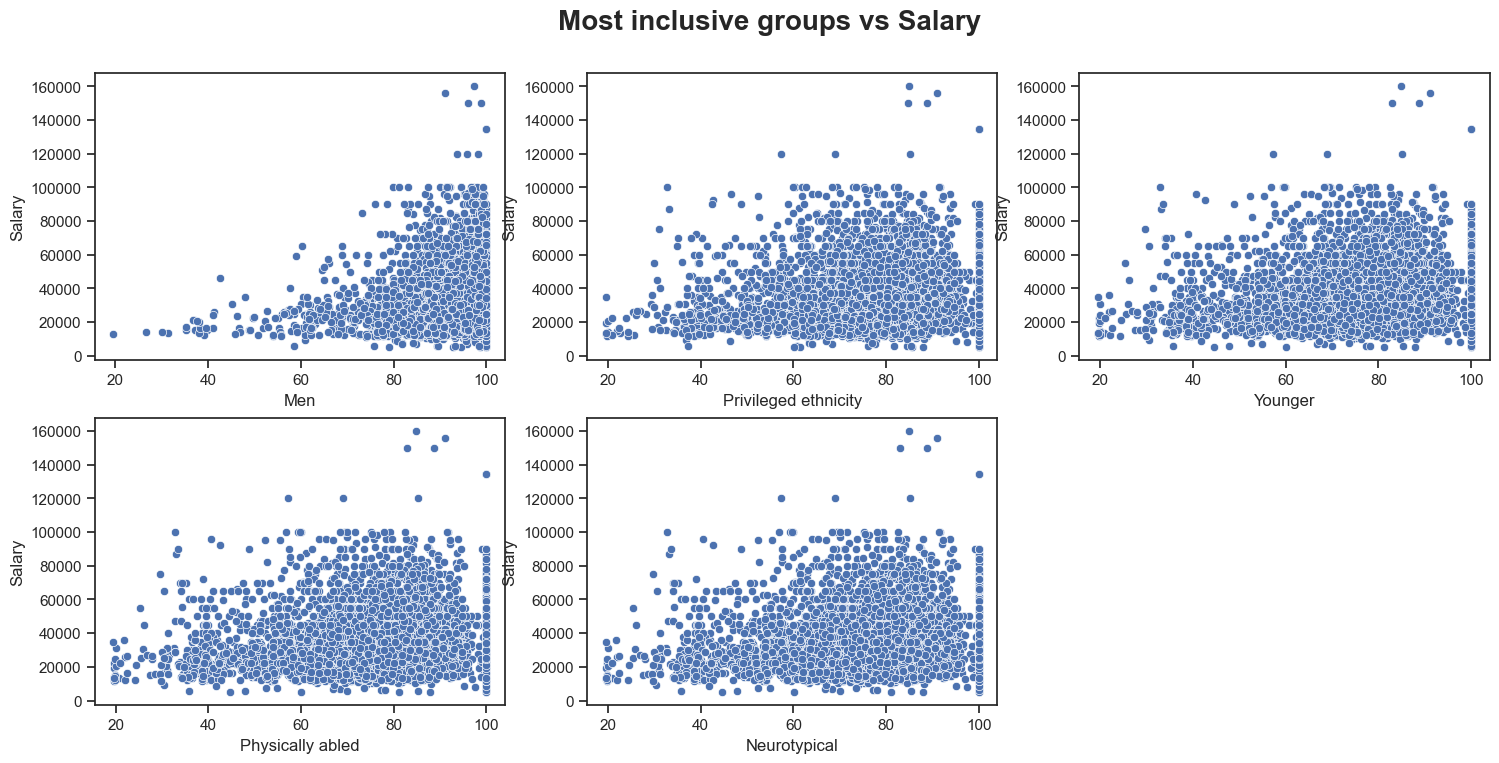

In [9]:
# Select the relevant columns from the dataset
score_cols = ['Men', 'Priviliged ethnicity', 'Younger', 'Physically abled', 'Neurotypical']
df_scores = new_df_data[score_cols + ['Salary']]

# Create a pairplot to present the 5 most inclusive groups vs salary
sns.set(style='ticks')
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
sns.scatterplot(ax=axes[0, 0], data=df_scores, x='Men', y='Salary', palette=['green'])
sns.scatterplot(ax=axes[0, 1], data=df_scores, x='Priviliged ethnicity', y='Salary', palette=['green'])
sns.scatterplot(ax=axes[0, 2], data=df_scores, x='Younger', y='Salary', palette=['green'])
sns.scatterplot(ax=axes[1, 0], data=df_scores, x='Physically abled', y='Salary', palette=['green'])
sns.scatterplot(ax=axes[1, 1], data=df_scores, x='Neurotypical', y='Salary', palette=['green'])

# Customize the plots
fig.suptitle('Most inclusive groups vs Salary', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.9)
axes[0, 0].set(xlabel='Men', ylabel='Salary')
axes[0, 1].set(xlabel='Privileged ethnicity', ylabel='Salary')
axes[0, 2].set(xlabel='Younger', ylabel='Salary')
axes[1, 0].set(xlabel='Physically abled', ylabel='Salary')
axes[1, 1].set(xlabel='Neurotypical', ylabel='Salary')
axes[1, 2].remove() # Remove the last empty subplot

plt.show()

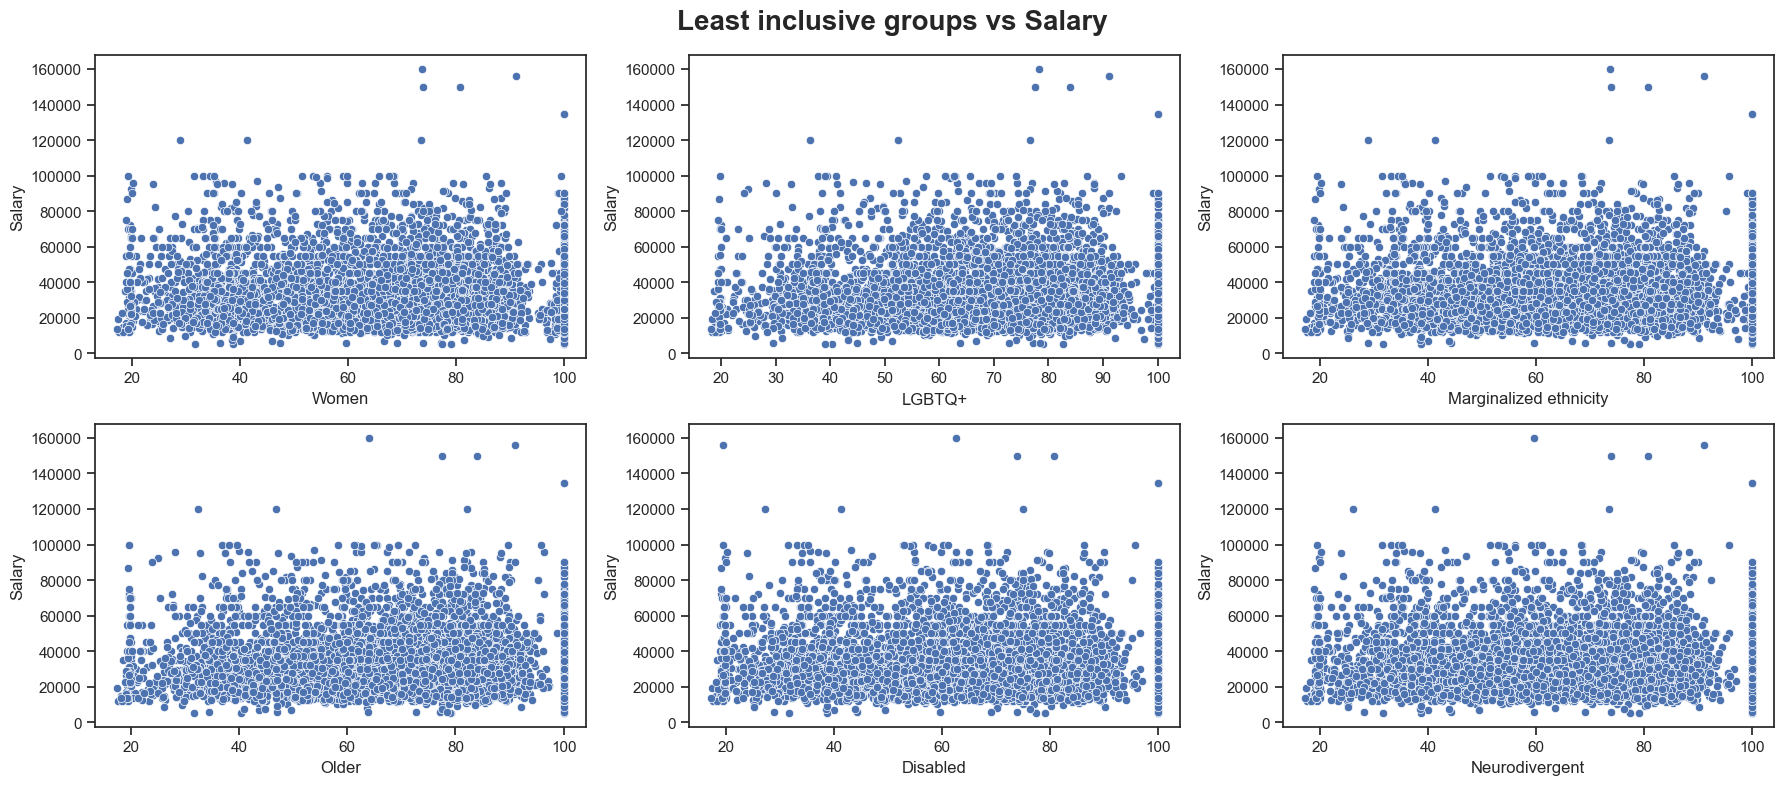

In [10]:
# Select the relevant columns from the dataset
score_cols = ['Women', 'LGBTQ+', 'Marginalized ethnicity', 'Older', 'Disabled', 'Neurodivergent']
df_scores = new_df_data[score_cols + ['Salary']]

sns.set(style='ticks')
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
for i, score_col in enumerate(score_cols):
    row_idx = i // 3
    col_idx = i % 3
    sns.scatterplot(ax=axes[row_idx, col_idx], data=df_scores, x=score_col, y='Salary', palette=['green'])
    axes[row_idx, col_idx].set(xlabel=score_col, ylabel='Salary')
fig.suptitle('Least inclusive groups vs Salary', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

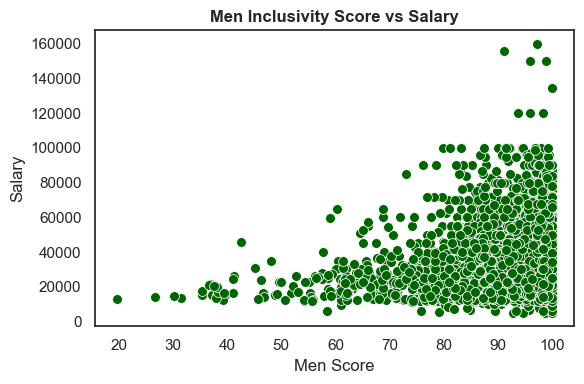

In [11]:
#Create a scatterplot for the most inclusive group: Men vs Salary
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=new_df_data, x='Men', y='Salary', s=50, color='darkgreen')
plt.title('Men Inclusivity Score vs Salary', fontweight="bold")
plt.xlabel('Men Score')
plt.ylabel('Salary')
plt.tight_layout()
plt.grid(False)
plt.show()

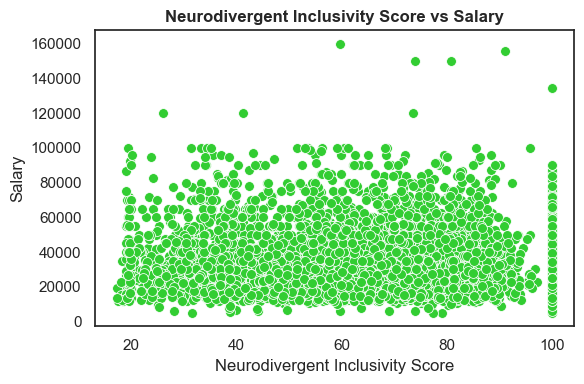

In [12]:
#Create a scatterplot for the most exclusive group: Neurodivergent vs Salary
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=new_df_data, x='Neurodivergent', y='Salary', s=50, color = 'limegreen')
plt.title('Neurodivergent Inclusivity Score vs Salary', fontweight="bold" )
plt.xlabel('Neurodivergent Inclusivity Score')
plt.ylabel('Salary')
plt.tight_layout()
plt.grid(False)
plt.show()